In [2]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

air = ml.Non_Dispersion(1)
sodalime = ml.Non_Dispersion(1.52)
#sodalime = ml.open_material('sodalime_Nanya', 'Material')
OC = ml.open_material('OC_LENS', 'Material')
OC_HRI = ml.open_material('OC_HRI_LENS', 'Material')
ITO_L = ml.open_material('ITO_LENS', 'Sellmeier')

ITO = ml.Cauchy([1.640727, 0.050604], ITO_L.k, ITO_L.wl_k)
SiN = ml.Cauchy([1.97812451, 0.0100578])
SiO2 = ml.Cauchy([1.50818418, 0.00141496727])

R_scan = pd.read_csv('./spectrum/LENS/LENS_rev3_SCAN.csv')['SCAN'].values
wl = np.linspace(400, 700, 301)

R_hypo = lambda th: tm.Design(
    [air, OC, SiN, SiO2, ITO, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(wl, 5)

R_tra_hypo = lambda th: tm.Design(
    [air, OC, SiN, SiO2, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[4], th[5], None]
).reflectance(wl, 5)

R_bri_hypo = lambda th: tm.Design(
    [air, OC, SiN, SiO2, ITO, OC, ITO, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[3], 1250 ,150,th[4], th[5], None]
).reflectance(wl, 5)

fom = lambda th:tm.RMSE(100*R_hypo(th), R_scan)

In [31]:
sol = differential_evolution(
    fom, [
        (1000,2600),(5,20.8),(37.62,47.62),(15.61,29.61),(16.54,31.54),(5.46,18.46)
    ], disp=True, polish=False, popsize=20, mutation=0.3, recombination =0.9,strategy = 'best1exp'
)
print(sol.x)

differential_evolution step 1: f(x)= 0.837497
differential_evolution step 2: f(x)= 0.622394
differential_evolution step 3: f(x)= 0.601345
differential_evolution step 4: f(x)= 0.518308
differential_evolution step 5: f(x)= 0.467164
differential_evolution step 6: f(x)= 0.379209
differential_evolution step 7: f(x)= 0.352572
differential_evolution step 8: f(x)= 0.349453
differential_evolution step 9: f(x)= 0.349415
differential_evolution step 10: f(x)= 0.348469
differential_evolution step 11: f(x)= 0.348436
differential_evolution step 12: f(x)= 0.348433
differential_evolution step 13: f(x)= 0.348411
[1893.97828353    6.96931396   40.85072996   21.81017022   31.23142148
    6.26074824]


In [1]:
m1 = [1887.6, 6.6, 41.6, 16.2, 28.6, 8.4]
tk = m1
plt.plot(wl, 100*R_hypo(tk), '-k', label = 'fitting')
plt.plot(wl, R_scan, 'kx', markersize = 4, label = 'scan')
plt.legend(loc = 'best')

#plt.savefig('LENS_rev3.png')
plt.show()
print(np.mean(R_scan))

NameError: name 'plt' is not defined

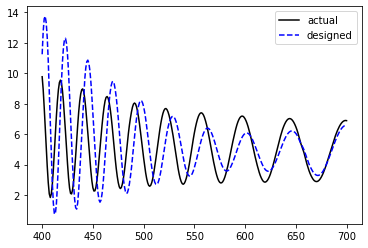

In [5]:
plt.plot(wl, 100*R_hypo([2460, 6.6, 41.6, 24.61, 28.6, 8.4]),'-k', label = 'actual')
plt.plot(wl, 100*R_hypo([2460, 15.8, 42.62, 24.61, 21.54, 13.46]), '--b', label = 'designed')
plt.legend(loc = 'best')
#plt.savefig('LENS_rev3_design.png')
plt.show()